In [2]:
library("ggplot2")
library("dplyr")

In [3]:
df = read.csv('../plots/deeplift/motif_boxplots/ETS_HNF_REST_data.csv', header = TRUE)

In [4]:
head(df)

X,motif,score,task
0,ETS,0.0017323120,"K562, real motif"
1,ETS,0.0068530249,"K562, real motif"
2,ETS,0.0014950467,"K562, real motif"
3,ETS,0.0087563545,"K562, real motif"
4,ETS,0.0007821653,"K562, real motif"
5,ETS,0.0079582296,"K562, real motif"


Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”

Saving 8 x 8 in image
Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”

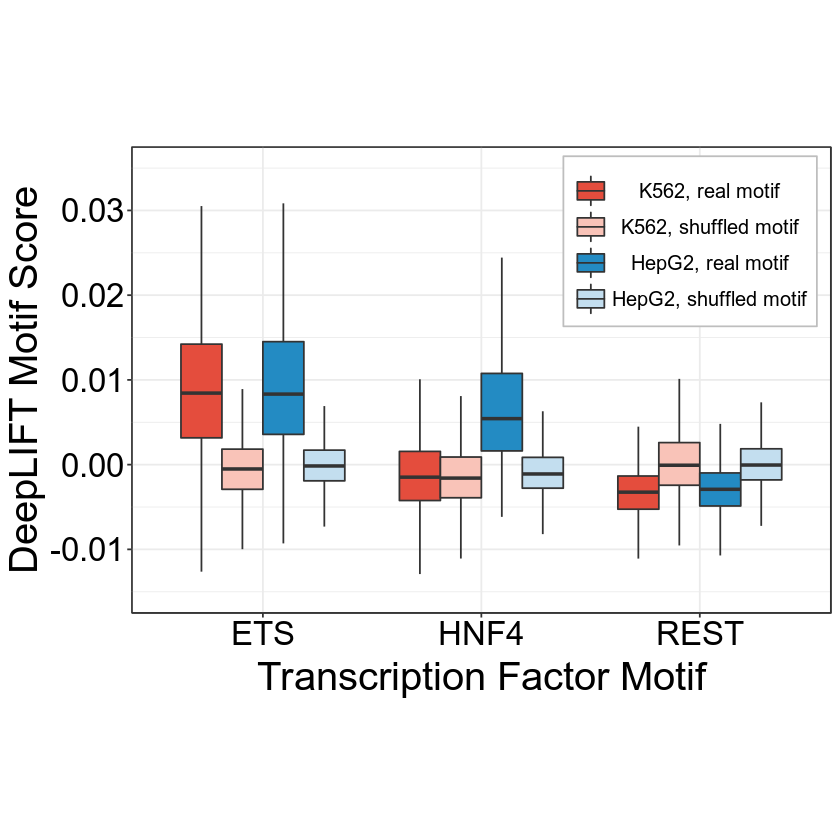

In [26]:
# cols <- c('#b92f2b', '#e7aa64', '#579352', '#4166a6'
taskOrder = c('K562, real motif', 'K562, shuffled motif', 'HepG2, real motif', 'HepG2, shuffled motif')
# sortedDf <- data.frame(df$task[order(match(df$task, taskOrder))])
sortedDf <- arrange(df, order(match(df$task, taskOrder)))
sortedDf$task <- factor(sortedDf$task, levels = taskOrder, ordered = TRUE)

scale <- c(1.2)

cols <- c('#E44D3D', '#F9C3B8', '#238BC3', '#c3deef')
p <- ggplot(sortedDf, aes(x = motif, y = score, fill = task)) +
        geom_boxplot(outlier.shape = NA) + 
        scale_y_continuous(limits = c(-0.015, 0.035)) +
        labs(x = 'Transcription Factor Motif', y = 'DeepLIFT Motif Score')
p <- p + scale_fill_manual(values=cols)
p <- p + theme_bw()
p <- p + theme(aspect.ratio=3/4.5)
p <- p + theme(
#                panel.grid.major = element_blank(), 
#                panel.grid.minor = element_blank(),
               legend.position=c(0.98,0.98),
               legend.title=element_blank(),
               legend.justification=c(1, 1),
               legend.key.size=unit(0.045, 'npc'),
               legend.text=element_text(size=12),
               legend.text.align = 0.5,
               legend.background=element_rect(fill='white', size=0.5, colour='grey'),
               axis.title=element_text(size=20*scale),
               axis.text=element_text(size=16.7*scale, colour='#000000'),
               panel.background=element_rect(size=0.3, colour='black')
            )
# p <- p + guides(fill = guide_legend(label.position = "right", 
#                                     label.vjust = 0.5,
#                                     label.hjust = 0.0,
#                                     label = TRUE)) 
p <- p + theme(axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))
p

ggsave("../plots/deeplift/motif_boxplots/ETS_HNF_REST_ggplot_correctRatio.png",
       scale = scale,
       plot = p,
       units = "in", dpi=1000)

In [ ]:
wilcox.test(df[df$motif %in% c('ETS'),]['score'])

In [228]:
head(df[which(df$motif %in% c('ETS'))])

ERROR: Error in `[.data.frame`(df, which(df$motif %in% c("ETS"))): undefined columns selected


In [232]:
head(df[df$motif %in% c('ETS'),]['score'])

score
0.0017323120
0.0068530249
0.0014950467
0.0087563545
0.0007821653
0.0079582296
